Accessing Remote Resources
==========================

Web pages and data
------------------

I have mentioned before how one can access data files on your hard drive, but Python also allows you to access remote data, for example on the internet. The easiest way to do this is to use the [requests](https://pypi.python.org/pypi/requests) module. To start off, you just can get the URL:

In [1]:
import requests

response = requests.get('http://xkcd.com/353/')
type(response)

requests.models.Response

``response`` holds the response now. You can access the content as text via the text-property:

In [2]:
print(response.text[:300])  # only print the first 300 characters

<!DOCTYPE html>
<html>
<head>
<link rel="stylesheet" type="text/css" href="/s/7d94e0.css" title="Default"/>
<title>xkcd: Python</title>
<meta http-equiv="X-UA-Compatible" content="IE=edge"/>
<link rel="shortcut icon" href="/s/919f27.ico" type="image/x-icon"/>
<link rel="icon" href="/s/919f27.ico" ty


You can either just use this information directly, or in some cases you might want to write it to a file.Let's download just the image from the comic above:

Now we can open a new (binary) file and download the data to the file.

In [7]:
with open('downloaded_image.png', 'wb') as f:
    f.write(r2.content)

Let's now load and display the image. One way is to use `matplotlib`'s `image` method.

In [122]:
import numpy as np

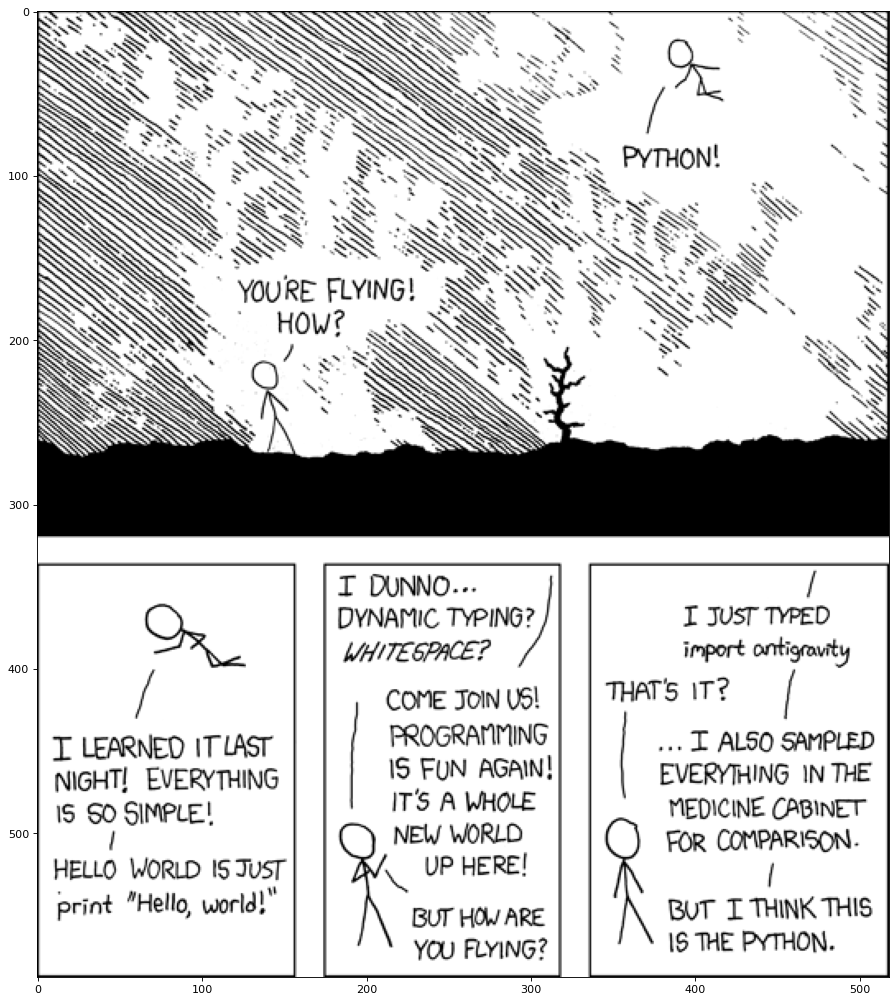

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
img = mpimg.imread('downloaded_image.png')
fig1 = plt.figure(figsize=(18, 16), dpi = 80, facecolor='w', edgecolor='k')
plt.imshow(img, cmap='gist_gray')

APIs
----

Imagine that you want to access some data online. 
A number of websites now offer an "Application programming interface" (or API) which is basically a way of accessing data is a machine-readable way. 
An example for weather data is http://openweathermap.org/API 


Let's however take an example from theoretical Astrophysics, which is the
[Illustris simulation](http://www.illustris-project.org). *The routines we use below are presented and described on their web page.*

Illustris is a cosmological simulation. It traces the positions and the formation of components such as dark matter, gas and stars across cosmic time from high-redshift to today. Extracting data at various cosmic times (=redshifts $z$), one can study, for instance, the gravitational collapse and merging history of clusters of galaxies and galaxies.

We show here how to extract the dark matter particles inside haloes you can pick from the
[illustris explorer](http://www.illustris-project.org/explorer) tool.

Once we have picked a halo ID, we can download the data. For the access, we need the access key.
This was generated for the use by this course (normally, every user has their own key.)

In [8]:
headers={"api-key":"2566d8dd2bcf9aefbb3d8b01080a877b"} # 2566... = key for Uni HD python course

In [9]:
import requests
r = requests.get('http://www.illustris-project.org/api/', headers=headers)
print (r.text[:1000])

{"simulations":[{"name":"Illustris-1","num_snapshots":134,"url":"http://www.illustris-project.org/api/Illustris-1/"},{"name":"Illustris-1-Dark","num_snapshots":136,"url":"http://www.illustris-project.org/api/Illustris-1-Dark/"},{"name":"Illustris-2","num_snapshots":136,"url":"http://www.illustris-project.org/api/Illustris-2/"},{"name":"Illustris-2-Dark","num_snapshots":136,"url":"http://www.illustris-project.org/api/Illustris-2-Dark/"},{"name":"Illustris-3","num_snapshots":136,"url":"http://www.illustris-project.org/api/Illustris-3/"},{"name":"Illustris-3-Dark","num_snapshots":136,"url":"http://www.illustris-project.org/api/Illustris-3-Dark/"},{"name":"TNG100-1","num_snapshots":100,"url":"http://www.illustris-project.org/api/TNG100-1/"},{"name":"TNG100-1-Dark","num_snapshots":100,"url":"http://www.illustris-project.org/api/TNG100-1-Dark/"},{"name":"TNG100-2","num_snapshots":100,"url":"http://www.illustris-project.org/api/TNG100-2/"},{"name":"TNG100-2-Dark","num_snapshots":100,"url":"ht

This is much shorter, but still not ideal for reading into Python in this form. The output details the available simulations and the number of snapshots in a format called **JSON ("JavaScript Object Notation")**. Python includes a library to easily read in this data:

In [10]:
import json
data = json.loads(r.text)

In [11]:
data

{'simulations': [{'name': 'Illustris-1',
   'num_snapshots': 134,
   'url': 'http://www.illustris-project.org/api/Illustris-1/'},
  {'name': 'Illustris-1-Dark',
   'num_snapshots': 136,
   'url': 'http://www.illustris-project.org/api/Illustris-1-Dark/'},
  {'name': 'Illustris-2',
   'num_snapshots': 136,
   'url': 'http://www.illustris-project.org/api/Illustris-2/'},
  {'name': 'Illustris-2-Dark',
   'num_snapshots': 136,
   'url': 'http://www.illustris-project.org/api/Illustris-2-Dark/'},
  {'name': 'Illustris-3',
   'num_snapshots': 136,
   'url': 'http://www.illustris-project.org/api/Illustris-3/'},
  {'name': 'Illustris-3-Dark',
   'num_snapshots': 136,
   'url': 'http://www.illustris-project.org/api/Illustris-3-Dark/'},
  {'name': 'TNG100-1',
   'num_snapshots': 100,
   'url': 'http://www.illustris-project.org/api/TNG100-1/'},
  {'name': 'TNG100-1-Dark',
   'num_snapshots': 100,
   'url': 'http://www.illustris-project.org/api/TNG100-1-Dark/'},
  {'name': 'TNG100-2',
   'num_snapsh

In fact, such a dictionary can be obtained at every level in the data tree (try, e.g., the next one http://www.illustris-project.org/api/Illustris-1/ )

Now we pick a halo to study. Try finding halo 75 or 1030 in the Explorer for a first visualization.

Specifications of data fields can be found [here](http://www.illustris-project.org/data/docs/specifications/).

In [12]:
id = 10             # choose your ID of the halo    75 or 1030 are defaults
redshift = 0.0         # choose a redshift, will be converted to snapshot automatically.
params = {'dm':'Coordinates','stars':'Coordinates'}

url = "http://www.illustris-project.org/api/Illustris-1/snapshots/z=" + str(redshift) + "/subhalos/" + str(id)

# read the parameters of the subhalo in the json format
subhalo = requests.get(url, headers=headers).json()

# read the cutout of the subhalo into memory
cutout  = requests.get(url+"/cutout.hdf5", headers=headers, params=params)

# extract the filename from the header information and build the output name
filename= cutout.headers['content-disposition'].split("filename=")[1]
outname=filename.split(".hdf5")[0]+"_z="+str(redshift)+".hdf5"

# save the cutout to disk, use 'outname'
with open(outname, 'wb') as f:
    f.write(cutout.content)

In [13]:
# library hdf5
import h5py
f = h5py.File("cutout_80_z=0.0.hdf5","r")
f.keys()

<KeysViewHDF5 ['Header', 'PartType1', 'PartType4']>

In [14]:
f['PartType1'].keys()

<KeysViewHDF5 ['Coordinates']>

In [15]:
f['PartType1']['Coordinates'][:]

array([[  720.73564092, 26301.1735671 , 18221.10228224],
       [  720.76933424, 26301.61833125, 18219.81985772],
       [  720.99799906, 26302.14670223, 18220.63831703],
       ...,
       [  741.03848248, 26304.99147192, 18214.44169163],
       [  723.86727661, 26303.88003953, 18220.93741808],
       [  713.96657621, 26296.30718188, 18225.70377154]])

The variable subhalo is a dictionary:

In [16]:
for key in sorted(subhalo):
    print (key,subhalo[key])

bhmdot 0.00883315
cm_x 1120.97
cm_y 26604.8
cm_z 18433.7
cutouts {'subhalo': 'http://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/10/cutout.hdf5', 'parent_halo': 'http://www.illustris-project.org/api/Illustris-1/snapshots/135/halos/0/cutout.hdf5'}
desc_sfid -1
desc_snap -1
gasmetallicity 0.0542751
gasmetallicityhalfrad 0.0544877
gasmetallicitymaxrad 0.0542751
gasmetallicitysfr 0.0570771
gasmetallicitysfrweighted 0.0571092
grnr 0
halfmassrad 32.4016
halfmassrad_bhs 0.0
halfmassrad_dm 37.4648
halfmassrad_gas 1.2368
halfmassrad_stars 8.4394
id 10
len 529610
len_bhs 1
len_dm 235159
len_gas 425
len_stars 294025
mass 120.37
mass_bhs 0.028627
mass_dm 103.681
mass_gas 0.043997
mass_log_msun 12.232945601385005
mass_stars 16.6164
massinhalfrad 16.3992
massinhalfrad_bhs 0.028627
massinhalfrad_dm 8.01903
massinhalfrad_gas 0.043333
massinhalfrad_stars 8.30817
massinmaxrad 22.4536
massinmaxrad_bhs 0.028627
massinmaxrad_dm 12.4796
massinmaxrad_gas 0.043997
massinmaxrad_stars 9.901

In [17]:
subhalo['len']

529610

The illustris data are in the [hdf5](https://support.hdfgroup.org/HDF5/) format. We need to write them to disk and
reload them. For this, we need to import the h5py package and read the file using *h5py.File*

The result is again a dictionary. We are here interested in the PartType1 key (dark matter), in particular the Coordinates.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print (outname)

cutout_10_z=0.0.hdf5


In [19]:
import h5py

#with h5py.File(outname) as f:
    # we subtract the centre of the halo (extracted from the dictionary information in subhalo)
    # from the particle coordinates
f = h5py.File(outname,"r")
print(f.keys())
dx = f['PartType1']['Coordinates'][:,0] - subhalo['pos_x']
dy = f['PartType1']['Coordinates'][:,1] - subhalo['pos_y']
dz = f['PartType1']['Coordinates'][:,2] - subhalo['pos_z']

dx1 = f['PartType4']['Coordinates'][:,0] - subhalo['pos_x']
dy1 = f['PartType4']['Coordinates'][:,1] - subhalo['pos_y']
dz1 = f['PartType4']['Coordinates'][:,2] - subhalo['pos_z']


<KeysViewHDF5 ['Header', 'PartType1', 'PartType4']>


(-100.0, 100.0)

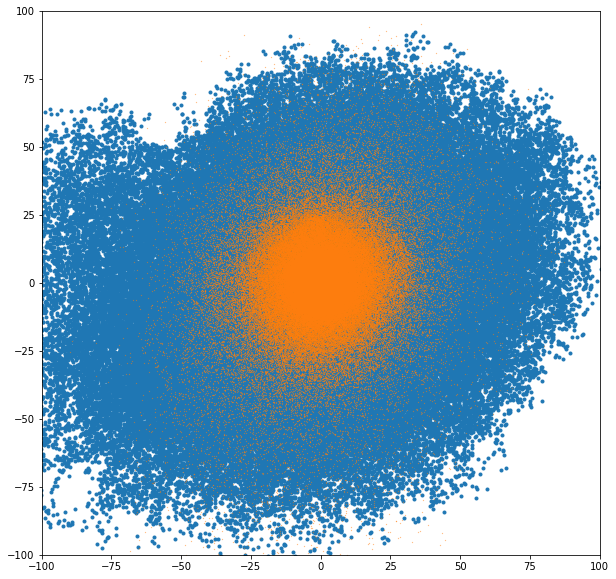

In [20]:
plt.figure(figsize=(10,10))
plt.plot(dx,dy,".")
plt.plot(dz1,dx1,"o",markersize=0.2)
plt.xlim(-100,100)
plt.ylim(-100,100)


## Exercise

Consider subhalo 75 or 1030 (choose) at the three redshifts z=0 (snapshot 135), z=0.5 (snapshot 103) and z=1 (snapshot 85). Note the mass of individual particl is $6.3 \times 10^6 M_\odot$ ($M_\odot$ = solar mass).

1. Look at the distribution of the mass particles.
   Determine the total dark matter mass inside R=10 kpc (ignore here the redshift and Hubble constant scaling of these units).

2. Determine the 
   density profiles $\rho = \frac{d N}{dV}$ for the halo at these three redshifts.
   $dN$ is the number of objects in the Volume $dV$.

   Can you find a redshift dependence?

   Remember: *plt.hist* can be used to build histograms.

   
3. (bonus, with time) Fit the functional form

    $\rho(r)=\frac{A}{\frac{r}{r_s} (1+\frac{r}{r_s})^n}$

   with n=3 or n=4 to the density profiles. Choose "sensible" fitting intervals.


**Note:** To simplify things, the following function was provided by the illustris project.

It takes a url as above and returns either the header information, or downloads binary data and returns the file name.

(from the illustris documentation [here](http://www.illustris-project.org/data/docs/api/) )